# Portfolio Project: Online Retail Exploratory Data Analysis with Python

## Overview

In this project, you will step into the shoes of an entry-level data analyst at an online retail company, helping interpret real-world data to help make a key business decision.

## Case Study
In this project, you will be working with transactional data from an online retail store. The dataset contains information about customer purchases, including product details, quantities, prices, and timestamps. Your task is to explore and analyze this dataset to gain insights into the store's sales trends, customer behavior, and popular products. 

By conducting exploratory data analysis, you will identify patterns, outliers, and correlations in the data, allowing you to make data-driven decisions and recommendations to optimize the store's operations and improve customer satisfaction. Through visualizations and statistical analysis, you will uncover key trends, such as the busiest sales months, best-selling products, and the store's most valuable customers. Ultimately, this project aims to provide actionable insights that can drive strategic business decisions and enhance the store's overall performance in the competitive online retail market.

## Project Objectives
1. Describe data to answer key questions to uncover insights
2. Gain valuable insights that will help improve online retail performance
3. Provide analytic insights and data-driven recommendations

## Dataset

The dataset you will be working with is the "Online Retail" dataset. It contains transactional data of an online retail store from 2010 to 2011. The dataset is available as a .xlsx file named `Online Retail.xlsx`. This data file is already included in the Coursera Jupyter Notebook environment, however if you are working off-platform it can also be downloaded [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx).

The dataset contains the following columns:

- InvoiceNo: Invoice number of the transaction
- StockCode: Unique code of the product
- Description: Description of the product
- Quantity: Quantity of the product in the transaction
- InvoiceDate: Date and time of the transaction
- UnitPrice: Unit price of the product
- CustomerID: Unique identifier of the customer
- Country: Country where the transaction occurred

## Tasks

You may explore this dataset in any way you would like - however if you'd like some help getting started, here are a few ideas:

1. Load the dataset into a Pandas DataFrame and display the first few rows to get an overview of the data.
2. Perform data cleaning by handling missing values, if any, and removing any redundant or unnecessary columns.
3. Explore the basic statistics of the dataset, including measures of central tendency and dispersion.
4. Perform data visualization to gain insights into the dataset. Generate appropriate plots, such as histograms, scatter plots, or bar plots, to visualize different aspects of the data.
5. Analyze the sales trends over time. Identify the busiest months and days of the week in terms of sales.
6. Explore the top-selling products and countries based on the quantity sold.
7. Identify any outliers or anomalies in the dataset and discuss their potential impact on the analysis.
8. Draw conclusions and summarize your findings from the exploratory data analysis.

## Task 1: Data Preprocessing

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel("C:/Users/k.v.shalini/Desktop/MyWorks/EDA of retail data in python/Online Retail.xlsx")
dfcopy = df.copy()
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [4]:
# % of rows that has negative quantity
df[df['Quantity'] < 0].shape[0] / df.shape[0] * 100

#taking absolute values to remove negative sign in quantity
df['Quantity'] = df['Quantity'].abs()

In [5]:
# % of rows that has negative quantity
df[df['UnitPrice'] < 0].shape[0] / df.shape[0] * 100

0.0003690656549346846

In [6]:
#Only one unit price was negative, hence, absolute value is taken
df['UnitPrice'] = df['UnitPrice'].abs()

In [7]:
# Derived variables for future insights
df['SaleValue'] = df['Quantity'] * df['UnitPrice']

In [8]:
print(df['CustomerID'].nunique())
print(df['Country'].nunique())
print(df['StockCode'].nunique())

4372
38
4070


In [9]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
SaleValue           0
dtype: int64

In [10]:
print(df['InvoiceDate'].min())
print(df['InvoiceDate'].max())

2010-12-01 08:26:00
2011-12-09 12:50:00


In [11]:
l1 = df['InvoiceNo'].unique()
l2 = df['CustomerID'].unique()

common_elements = set(l1) & set(l2)
if common_elements:
    print("Common elements are:", common_elements)
else:
    print("No common elements")

No common elements


In [12]:
#Fill the NaN customerID with its corresponding invoice number
df['CustomerID'] = df['CustomerID'].fillna(df['InvoiceNo'])

In [13]:
# Fill the NaN description cells with the description of the same stockcode in other records

df['Description'] = df.groupby('StockCode')['Description'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))

C:\Users\k.v.shalini\AppData\Local\Temp\ipykernel_13096\2076905900.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Description'] = df.groupby('StockCode')['Description'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))
C:\Users\k.v.shalini\AppData\Local\Temp\ipykernel_13096\2076905900.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Description'] = df.groupby('StockCode')['Description'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))


In [14]:
df['Description']

0          WHITE HANGING HEART T-LIGHT HOLDER
1                         WHITE METAL LANTERN
2              CREAM CUPID HEARTS COAT HANGER
3         KNITTED UNION FLAG HOT WATER BOTTLE
4              RED WOOLLY HOTTIE WHITE HEART.
                         ...                 
541904            PACK OF 20 SPACEBOY NAPKINS
541905           CHILDREN'S APRON DOLLY GIRL 
541906          CHILDRENS CUTLERY DOLLY GIRL 
541907        CHILDRENS CUTLERY CIRCUS PARADE
541908          BAKING SET 9 PIECE RETROSPOT 
Name: Description, Length: 541909, dtype: object

In [15]:
df = df.drop_duplicates()

In [16]:
df['month_name'] = df['InvoiceDate'].dt.month_name()
df['year'] = df['InvoiceDate'].dt.year
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
df['month_name'] = pd.Categorical(df['month_name'], categories=month_order, ordered=True)
df['datekey'] = df['InvoiceDate'].dt.strftime("%b'%y")
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,SaleValue,month_name,year,datekey
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,December,2010,Dec'10
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,December,2010,Dec'10
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,December,2010,Dec'10
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,December,2010,Dec'10
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,December,2010,Dec'10
...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,December,2011,Dec'11
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,December,2011,Dec'11
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,December,2011,Dec'11
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,December,2011,Dec'11


### Regional Performance Analysis

In [17]:
country_sales= df.groupby('Country')['SaleValue'].sum().reset_index().sort_values(by='SaleValue', ascending=False)
total_sales = df['SaleValue'].sum()
country_sales['perc of total sales'] = (country_sales['SaleValue'] / total_sales) * 100
country_sales

RestOfWorld_Sales = country_sales[country_sales["Country"] != "United Kingdom"]

C:\Users\k.v.shalini\AppData\Local\Temp\ipykernel_13096\2775565786.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country', y='SaleValue', data=RestOfWorld_Sales, palette='Blues_d')


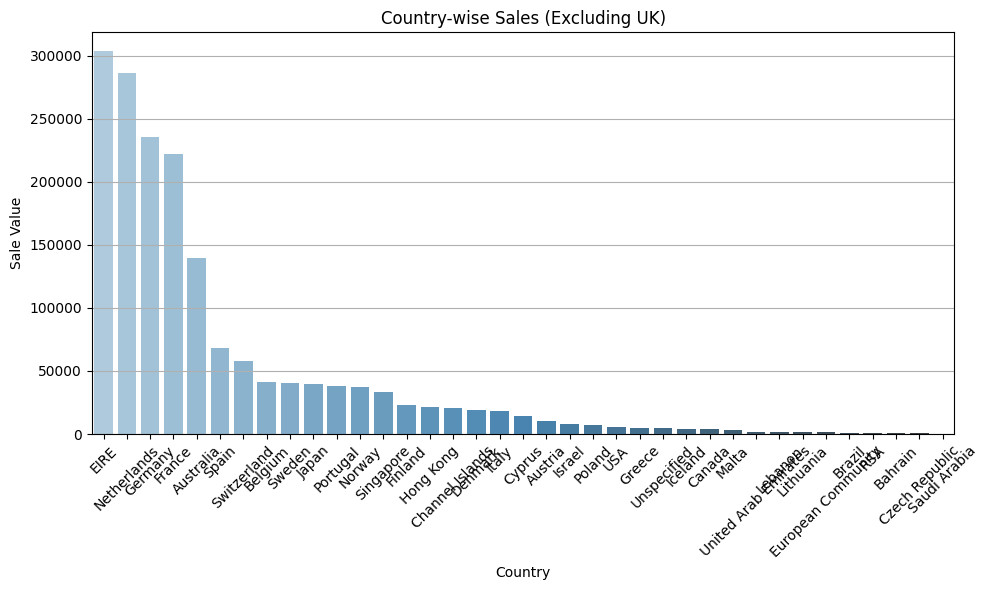

In [18]:
#Country wise sales excluding UK

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.barplot(x='Country', y='SaleValue', data=RestOfWorld_Sales, palette='Blues_d')
plt.title('Country-wise Sales (Excluding UK)')
plt.xlabel('Country')
plt.ylabel('Sale Value')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()

In [22]:

Monthly_Sales = df.groupby(['Country','datekey'],as_index=False)['SaleValue'].sum().sort_values(by=['Country','datekey']).reset_index(drop=True)
#df = df.sort_values(by='datekey').reset_index(drop=True)
Monthly_Sales['datekey'] = pd.to_datetime(Monthly_Sales['datekey'], format="%b'%y")
ROW_Monthly_Sales = Monthly_Sales[Monthly_Sales['Country']!="United Kingdom"]
ROW_Monthly_Sales

,Country,datekey,SaleValue
0,Australia,2011-04-01,1209.80
1,Australia,2011-08-01,22489.20
2,Australia,2010-12-01,993.10
3,Australia,2011-02-01,14763.37
4,Australia,2011-01-01,9017.71
...,...,...,...
309,Unspecified,2011-07-01,1419.11
310,Unspecified,2011-06-01,185.78
311,Unspecified,2011-05-01,1055.87
312,Unspecified,2011-11-01,965.75


C:\Users\k.v.shalini\AppData\Local\Temp\ipykernel_13096\710194994.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ROW_Monthly_Sales['datekey'] = pd.to_datetime(ROW_Monthly_Sales['datekey'], format="%b'%y")


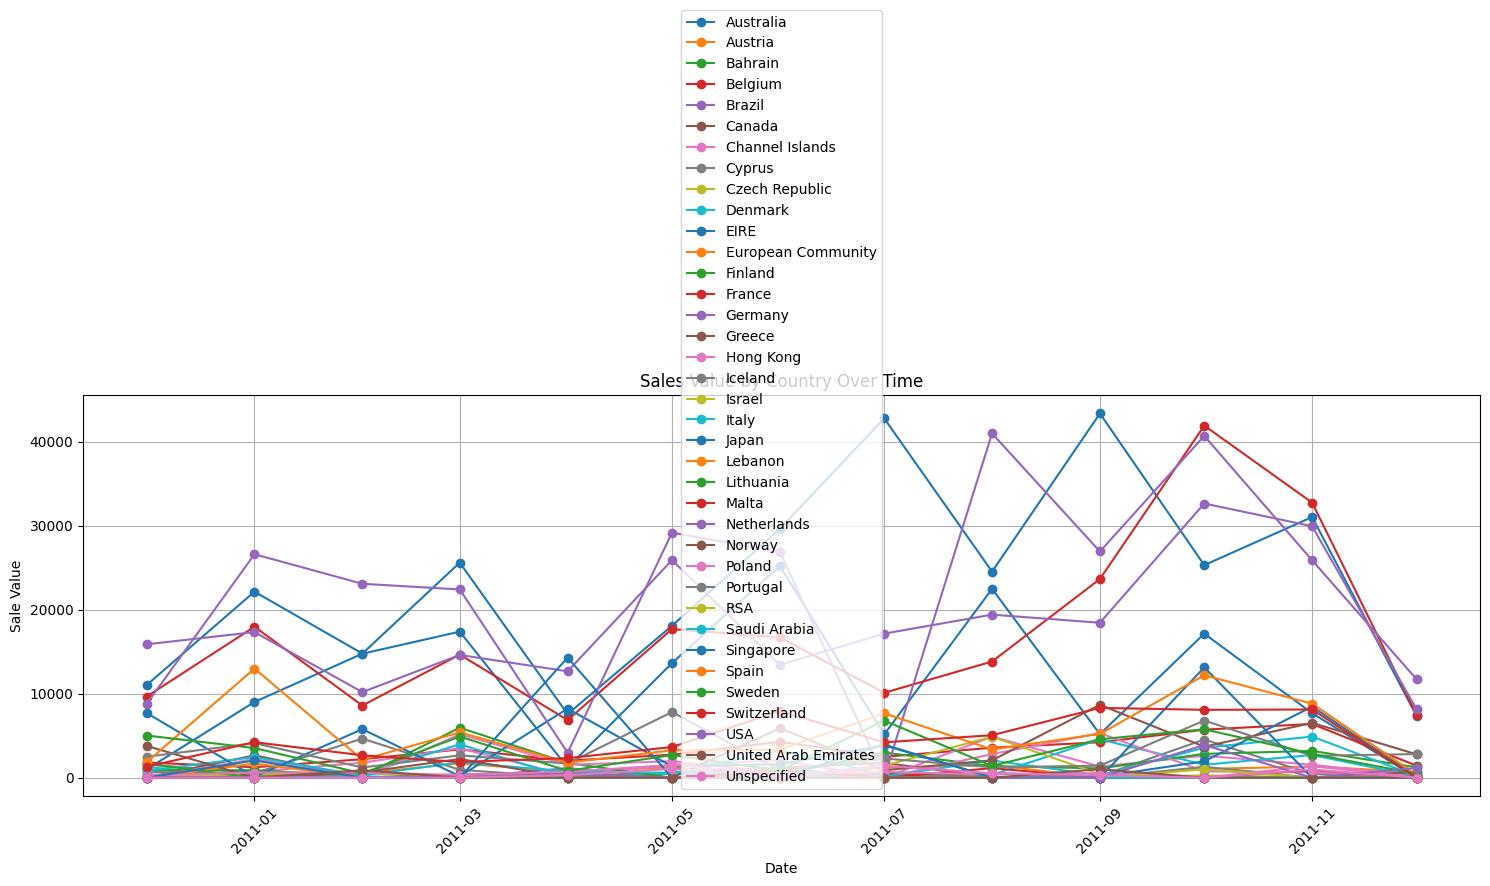

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'datekey' to datetime format
ROW_Monthly_Sales['datekey'] = pd.to_datetime(ROW_Monthly_Sales['datekey'], format="%b'%y")

# Group by Country and datekey
df_grouped = ROW_Monthly_Sales.groupby(['Country', 'datekey'])['SaleValue'].sum().reset_index()

# Pivot the DataFrame to have countries as columns
df_pivot = df_grouped.pivot(index='datekey', columns='Country', values='SaleValue').fillna(0)

# Plotting
plt.figure(figsize=(15,7))
for country in df_pivot.columns:
    plt.plot(df_pivot.index, df_pivot[country], marker='o', label=country)

plt.title('Sales Value by Country Over Time')
plt.xlabel('Date')
plt.ylabel('Sale Value')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


In [29]:
Monthly_Sales['SalesGrowth'] = df_grouped.groupby('Country')['SaleValue'].pct_change().fillna(0)
Monthly_Sales.head(100)

,Country,datekey,SaleValue,SalesGrowth
0,Australia,2011-04-01,1209.80,0.000000
1,Australia,2011-08-01,22489.20,8.080365
2,Australia,2010-12-01,993.10,0.637153
3,Australia,2011-02-01,14763.37,0.178098
4,Australia,2011-01-01,9017.71,-0.930442
...,...,...,...,...
95,European Community,2011-04-01,191.40,0.000000
96,European Community,2011-07-01,676.80,1.301724
97,European Community,2011-06-01,440.55,0.536261
98,Finland,2011-04-01,1751.03,0.000000


In [32]:
customer_count = df.groupby('Country')['CustomerID'].nunique().reset_index(name='Count of unique Customers').sort_values(by='Count of unique Customers', ascending=False)

In [33]:
region_df = country_sales.merge(customer_count, on='Country', how='left')

In [34]:
region_df['Revenue per Customer'] = (region_df['SaleValue'] / region_df['Count of unique Customers']).round(2)

In [35]:
region_df.sort_values(by='perc of total sales')

,Country,SaleValue,perc of total sales,Count of unique Customers,Revenue per Customer
37,Saudi Arabia,160.670,0.001390,1,160.67
36,Czech Republic,945.760,0.008183,1,945.76
35,Bahrain,959.880,0.008305,4,239.97
34,RSA,1002.310,0.008672,1,1002.31
33,Brazil,1143.600,0.009894,1,1143.60
32,European Community,1308.750,0.011323,1,1308.75
31,Lithuania,1661.060,0.014371,1,1661.06
30,Lebanon,1693.880,0.014655,1,1693.88
29,United Arab Emirates,1902.280,0.016458,2,951.14
28,Malta,2945.710,0.025486,2,1472.86


### Product Performance Analysis

In [36]:
product_sale = df.groupby('StockCode')['Quantity'].sum().reset_index().sort_values(by='Quantity', ascending = False)

In [37]:
product_sale

,StockCode,Quantity
2429,23843,161990
1983,23166,152527
1070,22197,57369
2622,84077,56151
3659,85099B,49490
...,...,...
3737,85226A,1
2589,79320,1
3753,90000C,1
3797,90025B,1


### Trend Analysis

In [43]:
monthly_sales = df.groupby('month_name')['SaleValue'].sum().reset_index().sort_values(by='month_name')
monthly_sales

C:\Users\k.v.shalini\AppData\Local\Temp\ipykernel_36312\2185642572.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_sales = df.groupby('month_name')['SaleValue'].sum().reset_index().sort_values(by='month_name')


,month_name,SaleValue
0,January,821174.660
1,February,548064.710
2,March,750416.540
3,April,581569.141
4,May,816499.120
5,June,831116.790
6,July,755995.251
7,August,834296.300
8,September,1095273.702
9,October,1233159.230


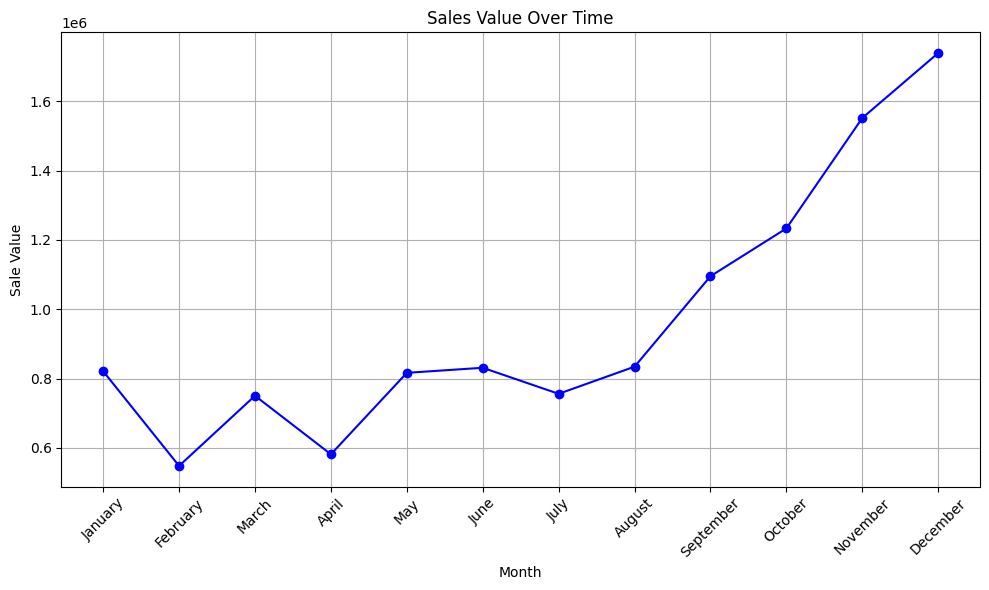

In [44]:
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales['month_name'], monthly_sales['SaleValue'], marker='o', linestyle='-', color='blue')
plt.title('Sales Value Over Time')
plt.xlabel('Month')
plt.ylabel('Sale Value')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

In [45]:
df['day'] = df['InvoiceDate'].dt.day_name()
day_sales = df.groupby('day')['SaleValue'].sum().reset_index()

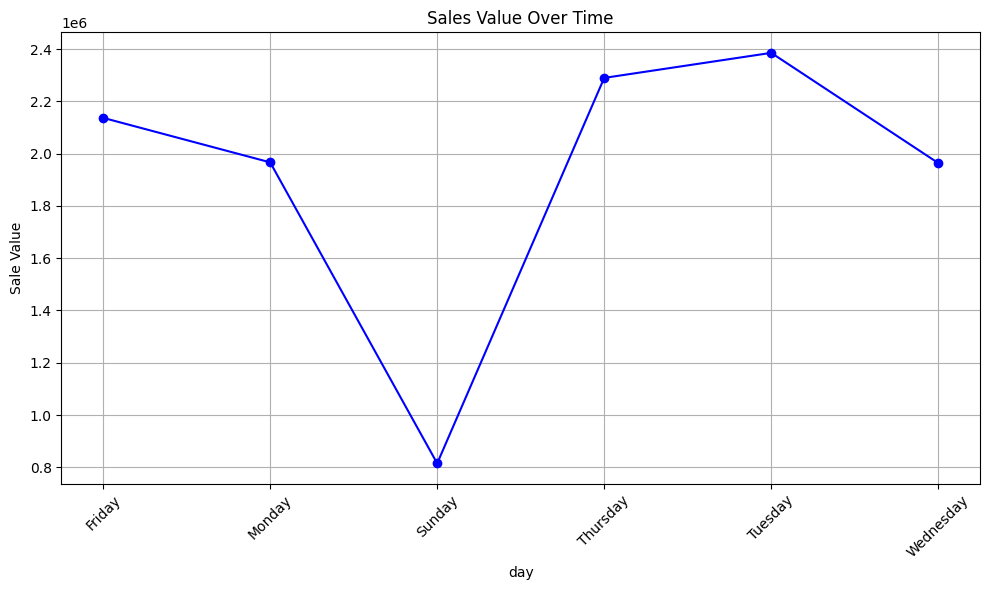

In [48]:
plt.figure(figsize=(10, 6))
plt.plot(day_sales['day'], day_sales['SaleValue'], marker='o', linestyle='-', color='blue')
plt.title('Sales Value Over Time')
plt.xlabel('day')
plt.ylabel('Sale Value')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()